# PROYECTO FINAL DE PYTHON #
### Alumno : Héctor Juan León Arcines  _____________  Grupo : 22 ###

## .

## .

## ¿Cuál es el objetivo principal? ## 
#### En breves lineas, el objetivo principal de este proyecto  es crear un modelo de regresión logística para predecir si un paciente padece o no de una enfermedad en el corazón, a través de 11 características que posee el Heart Failure Prediction Dataset.


#### Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en el mundo y se cobran aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de todas las muertes en el mundo. Cuatro de cada cinco muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren de forma prematura en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos contiene 11 características que se pueden utilizar para predecir una posible enfermedad cardíaca.

In [1]:
#Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

##### Cargamos el CSV #####

In [2]:

data = pd.read_csv('heart.csv', sep=';') 


#### Encontramos en nuestro csv, que numerosas filas tenian valor 0 en la columna Colesterol, lo cual es imposible, y quiere decir que no se contaba con la medida del Colesterol de esos pacientes, entonces reemplazamos los valores 0 por la media de los valores que no son 0 en la columna Colesterol. La media es de aproximadamente 244.

In [3]:
# Calcular la media de los valores que no son 0
mean_cholesterol = data[data['Cholesterol'] != 0]['Cholesterol'].mean()

# Reemplazar los valores 0 por la media 
data['Cholesterol'] = data['Cholesterol'].replace(0, mean_cholesterol)

#La media de los valores es 244.635389
#print(mean_cholesterol)


data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### En esta celda de código podemos observar cuántos pacientes presentan una enfermedad cardíaca y cuántos no:

In [4]:
print(data.groupby('HeartDisease').size())
#410 no presentan una enfermedad cardiaca 
#508 presentan una enfermedad cardiaca 

HeartDisease
0    410
1    508
dtype: int64


#### El conjunto de datos que estamos analizando, cuenta con 5 variables de tipo Cualitativas (Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Sloper), para poder realizar la regresión tuvimos que convertirlas a Cuantitativas

In [5]:
#Convertir a variables numericas las columnas: Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Sloper
encoder = OrdinalEncoder()

columns_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
encoder.fit(data[columns_to_encode])

data[columns_to_encode] = encoder.transform(data[columns_to_encode])

data


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1.0,1.0,140,289.0,0,1.0,172,0.0,0.0,2.0,0
1,49,0.0,2.0,160,180.0,0,1.0,156,0.0,1.0,1.0,1
2,37,1.0,1.0,130,283.0,0,2.0,98,0.0,0.0,2.0,0
3,48,0.0,0.0,138,214.0,0,1.0,108,1.0,1.5,1.0,1
4,54,1.0,2.0,150,195.0,0,1.0,122,0.0,0.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1.0,3.0,110,264.0,0,1.0,132,0.0,1.2,1.0,1
914,68,1.0,0.0,144,193.0,1,1.0,141,0.0,3.4,1.0,1
915,57,1.0,0.0,130,131.0,0,1.0,115,1.0,1.2,1.0,1
916,57,0.0,1.0,130,236.0,0,0.0,174,0.0,0.0,1.0,1


#### Realizamos un histograma de cada variable para ver como se comporta la distribución de los datos

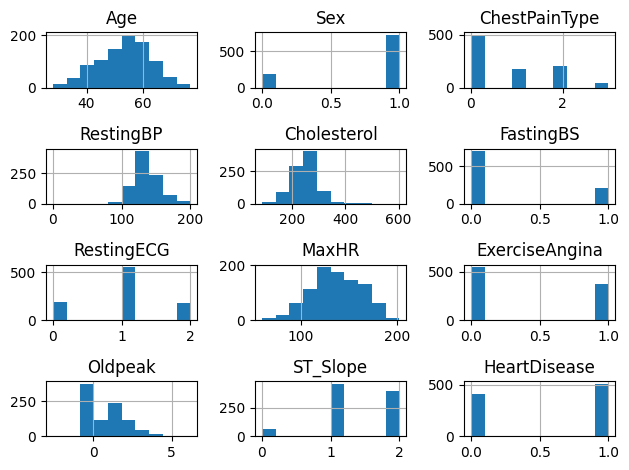

In [6]:
#Histograma de cada variable
data.hist()
plt.tight_layout()
plt.show()

#### Además se creó un gráfico de dispersión de tipo 'scatter' con la librería Seaborn
#### Para esto, eliminamos las filas con valores perdidos (representados por NaN) de los datos antes de trazarlos. Esto asegura que el gráfico muestre solo puntos de datos válidos y hue='HeartDisease' especifica que la variable 'HeartDisease' se utilizará para colorear los puntos de datos en los gráficos de dispersión. Esto ayudará a visualizar cómo se relaciona 'HeartDisease' con las otras variables.

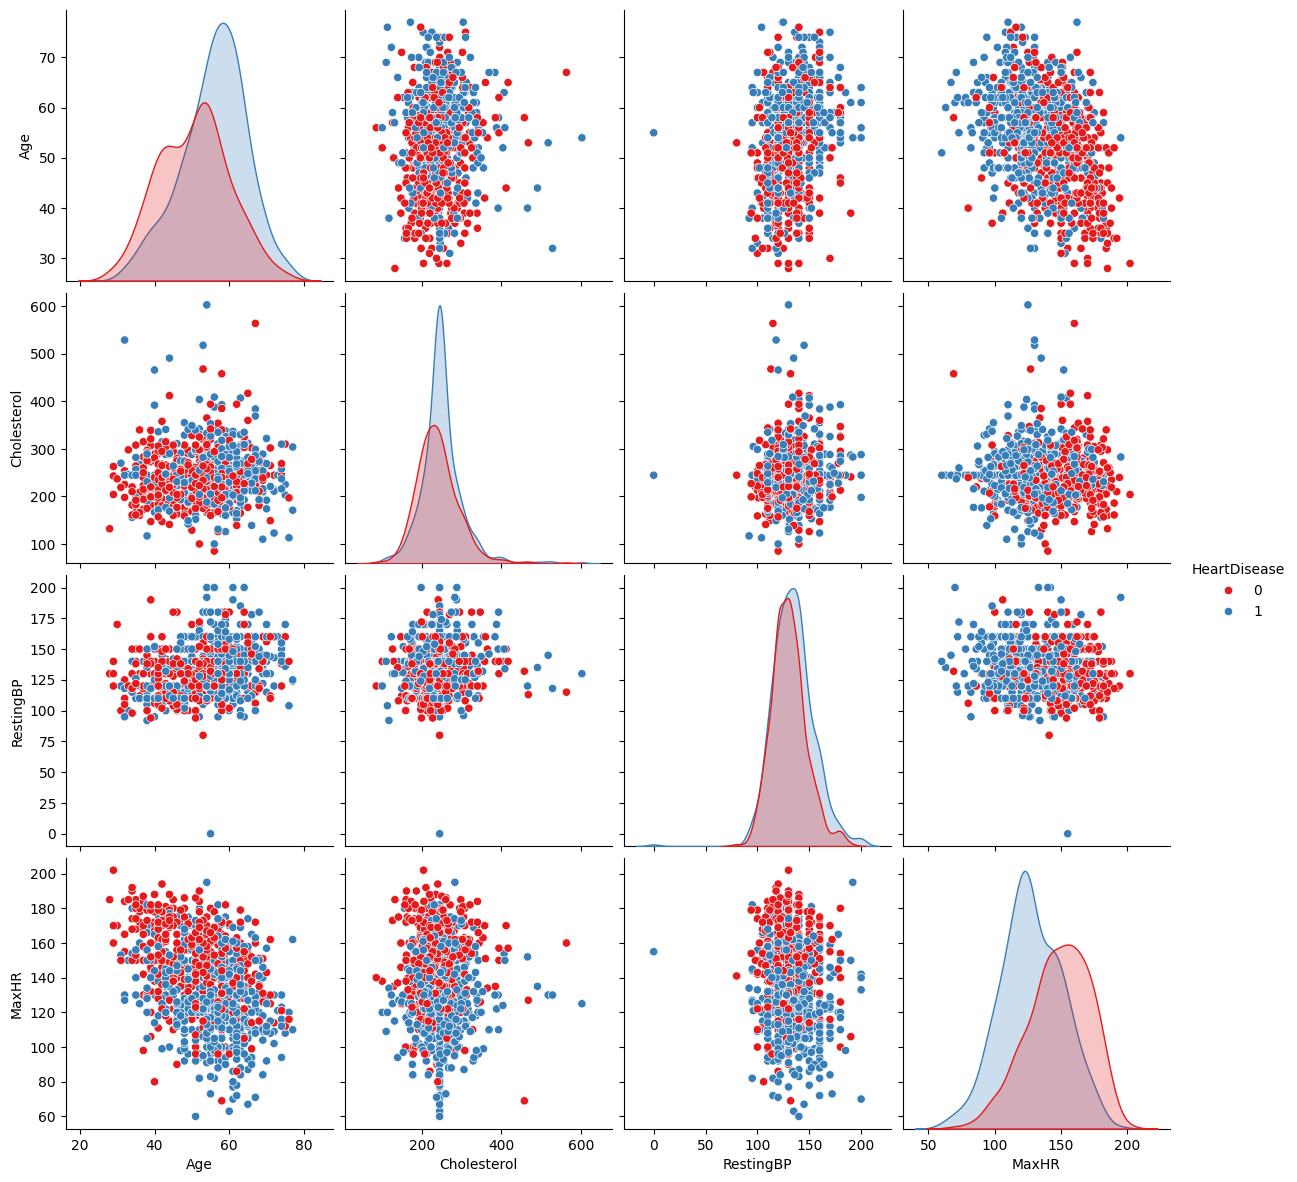

In [7]:
import warnings
warnings.filterwarnings("ignore")
sb.pairplot(data.dropna(), hue='HeartDisease',height=3,vars=["Age","Cholesterol","RestingBP", "MaxHR"],kind='scatter', palette = "Set1")

### Modelo de Regresión Logística

#### Con las librerías train_test_split de sklearn.model_selection (importadas en la parte superior del Notebook) se divide el conjunto de datos en entrenamiento y prueba. LogisticRegression de sklearn.linear_model crea el modelo de regresión logística y accuracy_score, confusion_matrix y classification_report de sklearn.metrics evaluan el rendimiento del modelo.
#### Cargamos el conjunto de datos y se elimina la columna 'HeartDisease', ya que esta será la variable a predecir. Se separan las variables independientes (en X) y la variable dependiente (en y). Se dividen los datos en dos conjuntos: entrenamiento (X_train, y_train) y prueba (X_test, y_test). Se utiliza train_test_split para realizar esta división aleatoriamente, asignando un 20% de los datos al conjunto de prueba.


In [8]:
X = data.drop('HeartDisease', axis=1)  
y = data['HeartDisease']             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Luego, se crea una instancia del modelo LogisticRegression y entrenamos el modelo usando el método fit con los datos de entrenamiento (X_train e y_train).

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Predecimos la variable dependiente para el conjunto de prueba (X_test) usando el método predict.

In [13]:
y_pred = model.predict(X_test)

#### Se calcula la precisión del modelo usando accuracy_score, se genera la matriz de confusión usando confusion_matrix y un informe de clasificación detallado usando classification_report. Luego, mostramos la precisión media de las predicciones usando el método score.

In [21]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Exactitud:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

report = classification_report(y_test, y_pred, target_names=['No presentan una enfermedad cardiaca ', 'Presentan una enfermedad cardiaca '])
print("Reporte de clasificación:\n", report)
print("Precisión media de las predicciones:", model.score(X,y))

Exactitud: 0.8478260869565217
Matriz de confusión:
 [[68  9]
 [19 88]]
Reporte de clasificación:
                                        precision    recall  f1-score   support

No presentan una enfermedad cardiaca        0.78      0.88      0.83        77
   Presentan una enfermedad cardiaca        0.91      0.82      0.86       107

                             accuracy                           0.85       184
                            macro avg       0.84      0.85      0.85       184
                         weighted avg       0.85      0.85      0.85       184

Precisión media de las predicciones: 0.8474945533769063
